In [2]:
import numpy as np
import pandas as pd
import os
from os.path import isfile, join
from os import listdir
import scipy.io
import matplotlib.pyplot as plt
import scipy.signal
from tqdm import tqdm
import seaborn as sns

# Load envelope data computed from matlab script

In [40]:
path= os.getcwd()
envelope = np.load(path+'//word_envelope_example.npy',allow_pickle='TRUE').item()

In [41]:
envelope.keys()

dict_keys(['word_envelope', 'fs'])

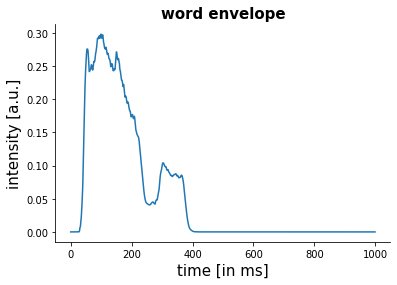

In [42]:
fig,ax = plt.subplots(1,1)
ax.plot(envelope['word_envelope']);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("time [in ms]", fontsize =15)
ax.set_ylabel("intensity [a.u.]", fontsize =15)
plt.title("word envelope", weight='bold', fontsize =15);

# Compute PSD (welch)

In [43]:
F, PSD = scipy.signal.welch(envelope['word_envelope'], fs=envelope['fs'], window='hanning', nfft=10000 ,
                  detrend='constant', return_onesided=True, scaling='spectrum',
                  axis=-1);

# Find maximum 

In [44]:
maxi = np.argmax(PSD) 
foi = F[maxi]

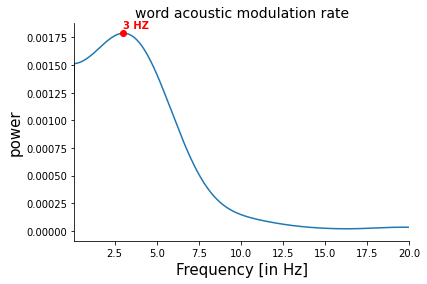

In [45]:
fig,ax = plt.subplots(1,1)
ax.plot(F, PSD);
ax.plot(foi,PSD[maxi],'ro')
ax.text(foi,PSD[maxi]+0.00005, str(int(foi))+' HZ',color='red', weight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Frequency [in Hz]", fontsize =15)
ax.set_ylabel("power", fontsize =15)
ax.set_xlim(0.1,20)
plt.title("word acoustic modulation rate", fontsize =14);